# Сравнение средних

In [1]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

$H_0$ : среднее значение X равно некоторому известному значению m

t-статистика

\begin{equation*}
\LARGE
t = \frac{\overline{X} - m}{S_X / \sqrt{n}}
\end{equation*}

\begin{equation*}
\LARGE
s^2_X = \frac{ \sum_{t=1}^n (X_t - \overline{X})^2 }{(n - 1)}
\end{equation*}

### Одновыборочный критерий

In [2]:
data = pd.read_csv( 'hw_25000.csv', header = 1, names = ['index', 'height_inches', 'weight_pounds'], delimiter=';')
data['height'] = data['height_inches'] * 2.54
data.head()

,index,height_inches,weight_pounds,height
0,1,65.78331,112.9925,167.089607
1,2,71.51521,136.4873,181.648633
2,3,69.39874,153.0269,176.272800
3,4,68.21660,142.3354,173.270164
4,5,67.78781,144.2971,172.181037


__Отфильтруем первоначальный датасет, оставив в нем только значения роста от 170 см до 180 см.__

In [3]:
filter_data = data[(data['height'] >= 170) & (data['height'] <= 180)]

In [4]:
#Проверим полученный датасет
filter_data[filter_data['height']>180], filter_data[filter_data['height']<170], 

(Empty DataFrame
 Columns: [index, height_inches, weight_pounds, height]
 Index: [], Empty DataFrame
 Columns: [index, height_inches, weight_pounds, height]
 Index: [])

In [5]:
bins = np.linspace(150, 190, 50)

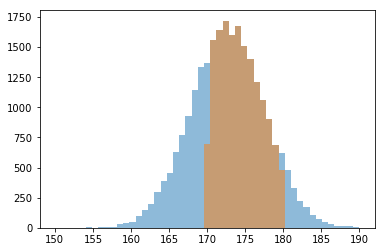

In [6]:
plt.hist(data['height'], bins, alpha = 0.5)
plt.hist(filter_data['height'], bins, alpha = 0.5)
plt.show()

__Случайным образом выберем 20 объектов.__

In [7]:
sample = filter_data.sample(n=20, random_state=10)

In [8]:
sample = sample['height'].tolist()

In [9]:
np.mean(sample)

174.65024252000001

In [10]:
data['height'].mean()

172.70250853587314

In [11]:
stats.ttest_1samp(sample, data['height'].mean())

Ttest_1sampResult(statistic=2.6691617367405431, pvalue=0.015163714685162371)

__Вывод: значение p меньше 0.05, следовательно разница статистически значима.__

### Двухвыборочный критерий

\begin{equation*}
\LARGE
t = \frac{ \overline{X_1} - \overline{X_2} }{(\sqrt{\frac{s^2_1}{n_1} + \frac{s^2_2}{n_2}}}
\end{equation*}

In [12]:
sample_from_data = data['height'].sample(n=20, random_state=20)

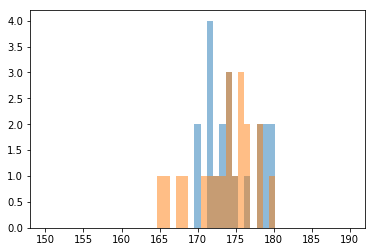

In [13]:
plt.hist(sample, bins, alpha = 0.5)
plt.hist(sample_from_data, bins, alpha = 0.5)
plt.show()

In [14]:
sample

[171.96673760000002,
 171.3075568,
 174.63462660000002,
 179.5007078,
 170.22356100000002,
 178.5843012,
 178.50985379999997,
 171.63369279999998,
 170.23557520000003,
 174.37122860000002,
 171.318936,
 173.04095439999998,
 178.1396996,
 173.8533226,
 173.4730338,
 179.00246140000002,
 179.8350988,
 173.95413520000002,
 172.75944619999999,
 176.65992100000003]

In [15]:
list(sample_from_data.values)

[168.27383159999999,
 178.5405878,
 176.73256500000002,
 173.79091479999997,
 175.84846720000004,
 172.47796339999999,
 164.89751120000003,
 177.83487420000003,
 171.1427616,
 176.31476040000001,
 175.76972720000001,
 167.66473960000002,
 165.58359060000004,
 174.9983292,
 172.93628100000001,
 179.90243420000002,
 175.69687999999999,
 174.18621500000003,
 172.02480199999999,
 174.45022260000002]

In [16]:
stats.ttest_ind(sample_from_data, sample)

Ttest_indResult(statistic=-1.0113576712411811, pvalue=0.31824197137427301)

__Значение p больше 0.05, следовательно разница статистически не значима.__